# Uderstanding-User-Experience-Using-Dental-Reviews

**Import libraries**

In [22]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 8,4

%matplotlib inline

**Scrapping Dentist Information from Yelp using BeautifulSoup and Python**

In [23]:
html1 = urlopen("https://www.yelp.com/search?find_desc=Dentists&find_loc=New%20York%2C%20NY")
html2 = urlopen("https://www.yelp.com/search?find_desc=Dentists&find_loc=New%20York%2C%20NY&start=10")
html3 = urlopen("https://www.yelp.com/search?find_desc=Dentists&find_loc=New%20York%2C%20NY&start=20")
bsObj1 = BeautifulSoup(html1)
bsObj2 = BeautifulSoup(html2)
bsObj3 = BeautifulSoup(html3)

**Identify specific item in the HTML data and extract the name of dentist, 
total reviews, and description of the reviews**

In [24]:
#Get the Names Dentist
nameList = bsObj1.findAll("h3")
for name in nameList:
 print(name.get_text())

nameList = bsObj2.findAll("h3")
for name in nameList:
 print(name.get_text())

nameList = bsObj3.findAll("h3")
for name in nameList:
 print(name.get_text())

Sponsored Results
Smiles on the Hudson
All Results
1. Midtown Dental Group
2. Tribeca Dental Design
3. Lumia Dental
4. iSmile Dental
5. Lily Eng, DDS
6. PDADental
7. Sonny Torres Oliva, DDS
8. VIP Dental Care
9. Stanton E Young, DMD
10. Bowery Dental
Related Searches in New York, NY
Get things done with Yelp.
Related Talk Topics
Not here? Tell us what we're missing.
About
Discover
Yelp for Business Owners
Languages
Countries
Sponsored Results
Smiles on the Hudson
All Results
11. Grand Street Dental
12. Brooklyn Heights Dental
13. All Smiles Dentistry
14. Clarence Loflin, DDS
15. Chelsea Dental Arts
16. The Dental Boutique
17. Bococa Dental
18. 209 NYC Dental
19. Tu’s Dental
20. Eric Steinbach, DDS - Park Slope Dental Aesthetics
Related Searches in New York, NY
Get things done with Yelp.
Related Talk Topics
Not here? Tell us what we're missing.
About
Discover
Yelp for Business Owners
Languages
Countries
Sponsored Results
Smiles on the Hudson
All Results
21. Dental Arts of Hoboken: Micha

In [25]:
#Get Total Reviews
nameList = bsObj1.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for name in nameList:
 print(name.get_text())

nameList = bsObj2.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for name in nameList:
 print(name.get_text())

nameList = bsObj3.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for name in nameList:
 print(name.get_text())

120 reviews
129 reviews
32 reviews
86 reviews
28 reviews
205 reviews
67 reviews
100 reviews
25 reviews
28 reviews
19 reviews
20 reviews
29 reviews
97 reviews
38 reviews
47 reviews
22 reviews
152 reviews
42 reviews
41 reviews
29 reviews
52 reviews
76 reviews
61 reviews
32 reviews
58 reviews
76 reviews
20 reviews
22 reviews
14 reviews


In [26]:
#Create a list that I will populate all the extracted names into.
Name1 = []
nameList = bsObj1.findAll("h3")
for i in nameList:
 #print(name.get_text())
    Name1.append(i.text)
    
Name2 = []
nameList = bsObj2.findAll("h3")
for i in nameList:
 #print(name.get_text())
    Name2.append(i.text)
    
Name3 = []
nameList = bsObj3.findAll("h3")
for i in nameList:
 #print(name.get_text())
    Name3.append(i.text)

In [27]:
#Name1 list of all dentist
Name1

['Sponsored Results',
 'Smiles on the Hudson',
 'All Results',
 '1.\xa0Midtown Dental Group',
 '2.\xa0Tribeca Dental Design',
 '3.\xa0Lumia Dental',
 '4.\xa0iSmile Dental',
 '5.\xa0Lily Eng, DDS',
 '6.\xa0PDADental',
 '7.\xa0Sonny Torres Oliva, DDS',
 '8.\xa0VIP Dental Care',
 '9.\xa0Stanton E Young, DMD',
 '10.\xa0Bowery Dental',
 'Related Searches in New York, NY',
 'Get things done with Yelp.',
 'Related Talk Topics',
 "Not here? Tell us what we're missing.",
 'About',
 'Discover',
 'Yelp for Business Owners',
 'Languages',
 'Countries']

In [28]:
#Name2 list of all dentist
Name2

['Sponsored Results',
 'Smiles on the Hudson',
 'All Results',
 '11.\xa0Grand Street Dental',
 '12.\xa0Brooklyn Heights Dental',
 '13.\xa0All Smiles Dentistry',
 '14.\xa0Clarence Loflin, DDS',
 '15.\xa0Chelsea Dental Arts',
 '16.\xa0The Dental Boutique',
 '17.\xa0Bococa Dental',
 '18.\xa0209 NYC Dental',
 '19.\xa0Tu’s Dental',
 '20.\xa0Eric Steinbach, DDS - Park Slope Dental Aesthetics',
 'Related Searches in New York, NY',
 'Get things done with Yelp.',
 'Related Talk Topics',
 "Not here? Tell us what we're missing.",
 'About',
 'Discover',
 'Yelp for Business Owners',
 'Languages',
 'Countries']

In [29]:
#Name3 list of all dentist
Name3

['Sponsored Results',
 'Smiles on the Hudson',
 'All Results',
 '21.\xa0Dental Arts of Hoboken: Michael Moawad, DMD',
 '22.\xa0Patient Friendly Dental',
 '23.\xa0Central Park West Dentistry',
 '24.\xa0All Smiles',
 '25.\xa0Kevin J Hansen, DDS',
 '26.\xa0Modern Family Dentistry',
 '27.\xa0Irina Rossinski, DDS',
 '28.\xa0Nai Yan Lam, DDS',
 '29.\xa0Gregg V Monterosso, DMD, PC',
 '30.\xa0Souferian B, DDS PC',
 'Related Searches in New York, NY',
 'Get things done with Yelp.',
 'Related Talk Topics',
 "Not here? Tell us what we're missing.",
 'About',
 'Discover',
 'Yelp for Business Owners',
 'Languages',
 'Countries']

**Clean all the list and extract only the names of the dentist**

In [30]:
Name1 = Name1[3:13]
Name1

['1.\xa0Midtown Dental Group',
 '2.\xa0Tribeca Dental Design',
 '3.\xa0Lumia Dental',
 '4.\xa0iSmile Dental',
 '5.\xa0Lily Eng, DDS',
 '6.\xa0PDADental',
 '7.\xa0Sonny Torres Oliva, DDS',
 '8.\xa0VIP Dental Care',
 '9.\xa0Stanton E Young, DMD',
 '10.\xa0Bowery Dental']

In [31]:
Name2 = Name2[3:13]
Name2

['11.\xa0Grand Street Dental',
 '12.\xa0Brooklyn Heights Dental',
 '13.\xa0All Smiles Dentistry',
 '14.\xa0Clarence Loflin, DDS',
 '15.\xa0Chelsea Dental Arts',
 '16.\xa0The Dental Boutique',
 '17.\xa0Bococa Dental',
 '18.\xa0209 NYC Dental',
 '19.\xa0Tu’s Dental',
 '20.\xa0Eric Steinbach, DDS - Park Slope Dental Aesthetics']

In [32]:
Name3 = Name3[3:13]
Name3

['21.\xa0Dental Arts of Hoboken: Michael Moawad, DMD',
 '22.\xa0Patient Friendly Dental',
 '23.\xa0Central Park West Dentistry',
 '24.\xa0All Smiles',
 '25.\xa0Kevin J Hansen, DDS',
 '26.\xa0Modern Family Dentistry',
 '27.\xa0Irina Rossinski, DDS',
 '28.\xa0Nai Yan Lam, DDS',
 '29.\xa0Gregg V Monterosso, DMD, PC',
 '30.\xa0Souferian B, DDS PC']

**Join all the list of Dentist Names into one list**

In [33]:
Name = Name1 + Name2 + Name3
Name

['1.\xa0Midtown Dental Group',
 '2.\xa0Tribeca Dental Design',
 '3.\xa0Lumia Dental',
 '4.\xa0iSmile Dental',
 '5.\xa0Lily Eng, DDS',
 '6.\xa0PDADental',
 '7.\xa0Sonny Torres Oliva, DDS',
 '8.\xa0VIP Dental Care',
 '9.\xa0Stanton E Young, DMD',
 '10.\xa0Bowery Dental',
 '11.\xa0Grand Street Dental',
 '12.\xa0Brooklyn Heights Dental',
 '13.\xa0All Smiles Dentistry',
 '14.\xa0Clarence Loflin, DDS',
 '15.\xa0Chelsea Dental Arts',
 '16.\xa0The Dental Boutique',
 '17.\xa0Bococa Dental',
 '18.\xa0209 NYC Dental',
 '19.\xa0Tu’s Dental',
 '20.\xa0Eric Steinbach, DDS - Park Slope Dental Aesthetics',
 '21.\xa0Dental Arts of Hoboken: Michael Moawad, DMD',
 '22.\xa0Patient Friendly Dental',
 '23.\xa0Central Park West Dentistry',
 '24.\xa0All Smiles',
 '25.\xa0Kevin J Hansen, DDS',
 '26.\xa0Modern Family Dentistry',
 '27.\xa0Irina Rossinski, DDS',
 '28.\xa0Nai Yan Lam, DDS',
 '29.\xa0Gregg V Monterosso, DMD, PC',
 '30.\xa0Souferian B, DDS PC']

In [34]:
#Create a list that I will populate all the extracted Reviews description into.
Review1 = []
review = bsObj1.findAll("p", {"class":"lemon--p__373c0__3Qnnj text__373c0__2pB8f text__373c0__2P1WD alternateStyling__373c0__2ithU text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_"})
for i in review:
 Review1.append(i.text)


Review2 = []
review = bsObj2.findAll("p", {"class":"lemon--p__373c0__3Qnnj text__373c0__2pB8f text__373c0__2P1WD alternateStyling__373c0__2ithU text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_"})
for i in review:
 Review2.append(i.text)

Review3 = []
review = bsObj3.findAll("p", {"class":"lemon--p__373c0__3Qnnj text__373c0__2pB8f text__373c0__2P1WD alternateStyling__373c0__2ithU text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_"})
for i in review:
 Review3.append(i.text)

**Clean all the list and extract only the review description of the dentist**

In [35]:
Review1 = Review1[0:10]
Review1

['“At Smiles on the Hudson, we do more than just patch up your teeth and send you on your way. We take time to collaborate with you and find the root cause of your dental problem. This…”\xa0read more',
 '“Dr. Bruno is so great. I kind of gave up on finding a dentist who was efficient, honest, kind, and…”\xa0read more',
 "“ and professional. Not many people can say that they'd like nothing more than to go out and have a beer with their…”\xa0read more",
 '“I am terrified of the dentist but the whole staff at Lumia Dental was wonderful. Dr. Donohue was my…”\xa0read more',
 '“Dr. Corapi is an excellent dentist! I left my former dentist of 30 years and was a little afraid to…”\xa0read more',
 '“I went to Dr. Eng for a sleep apnea retainer, and immediately broke up with my last dentist. Dr. Eng…”\xa0read more',
 "“I've been told since high school that I should try Invisalign but I didn't do it because of the cost and I wasn't comfortable…”\xa0read more",
 '“Best Dentist EVER!! Skilled,kind, 

In [36]:
Review2 = Review2[1:11]
Review2

['“I had the best experience starting as soon as I walked in the door. Kris at the front is not only welcoming but super…”\xa0read more',
 "“I've been a patient of Dr. Stanislaus and Dr. Reid for three years--they are absolutely wonderful. Everyone in the office is…”\xa0read more",
 '“ had. Her technique with numbing is superb - I honestly do not feel when the shot goes in. Cleanings and cavities are always on…”\xa0read more',
 '“I love Dr. Loflin. I am terrified of the dentist and Dr. Loflin and Natalie have been a revelation. We use nitrous gas and…”\xa0read more',
 '“Let me preface that I did not see this dentist...because I escaped before the appointment started.…”\xa0read more',
 "“BEST DENTIST EVER! I used to hate going to the dentist, but that's only because my old one sucked.…”\xa0read more",
 '“This is the best dentist/office I have ever been to. They are totally patient forward and every…”\xa0read more',
 '“Made a appointment 2 weeks Ahead. when making the appointment I was t

In [37]:
Review3 = Review3[1:11]
Review3

["“I don't have one complaint or negative comment about my appointment experience here. I was taking immediately, the waiting area was clean and comfortable, my…”\xa0read more",
 '“Dr. Lina is incredible! She is patient, takes her time to have you understand the work she will doing, and most importantly - always makes sure you are comfortable and not in any pain. It…”\xa0read more',
 "“Best Dentist group in NY. Wouldn't trust my teeth to any other Dentists. The entire staff is very professional and work with their patients to find the best…”\xa0read more",
 "“I used to be so nervous whenever I go to the dentist. That's no longer the case since I started coming here. Reasonable pricing, great customers service, very…”\xa0read more",
 "“I've recently found this office on Yelp and decided to try since it has the best reviews and 5 star rating. I had fears about going in since I haven't been in a while to a…”\xa0read more",
 "“WOW, never would I have thought that I wouldn't be afraid to go

**Join all the list of Reviews into one list**

In [38]:
Review = Review1 + Review2 + Review3
Review

['“At Smiles on the Hudson, we do more than just patch up your teeth and send you on your way. We take time to collaborate with you and find the root cause of your dental problem. This…”\xa0read more',
 '“Dr. Bruno is so great. I kind of gave up on finding a dentist who was efficient, honest, kind, and…”\xa0read more',
 "“ and professional. Not many people can say that they'd like nothing more than to go out and have a beer with their…”\xa0read more",
 '“I am terrified of the dentist but the whole staff at Lumia Dental was wonderful. Dr. Donohue was my…”\xa0read more',
 '“Dr. Corapi is an excellent dentist! I left my former dentist of 30 years and was a little afraid to…”\xa0read more',
 '“I went to Dr. Eng for a sleep apnea retainer, and immediately broke up with my last dentist. Dr. Eng…”\xa0read more',
 "“I've been told since high school that I should try Invisalign but I didn't do it because of the cost and I wasn't comfortable…”\xa0read more",
 '“Best Dentist EVER!! Skilled,kind, 

In [39]:
#Create a list that I will populate all the extracted the total Reviews into.
Ratings1 = []
ratings = bsObj1.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for i in ratings:
 Ratings1.append(i.text)


Ratings2 = []
ratings = bsObj2.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for i in ratings:
 Ratings2.append(i.text)

Ratings3 = []
ratings = bsObj3.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for i in ratings:
 Ratings3.append(i.text)

In [40]:
Ratings1 = Ratings1[0:12]
Ratings1

['120 reviews',
 '129 reviews',
 '32 reviews',
 '86 reviews',
 '28 reviews',
 '205 reviews',
 '67 reviews',
 '100 reviews',
 '25 reviews',
 '28 reviews']

In [41]:
Ratings2 = Ratings2[0:12]
Ratings2

['19 reviews',
 '20 reviews',
 '29 reviews',
 '97 reviews',
 '38 reviews',
 '47 reviews',
 '22 reviews',
 '152 reviews',
 '42 reviews',
 '41 reviews']

In [42]:
Ratings3 = Ratings3[0:12]
Ratings3

['29 reviews',
 '52 reviews',
 '76 reviews',
 '61 reviews',
 '32 reviews',
 '58 reviews',
 '76 reviews',
 '20 reviews',
 '22 reviews',
 '14 reviews']

**Join all the list of Dentist total reviews one list**

In [43]:
Ratings = Ratings1 + Ratings2 + Ratings3
Ratings

['120 reviews',
 '129 reviews',
 '32 reviews',
 '86 reviews',
 '28 reviews',
 '205 reviews',
 '67 reviews',
 '100 reviews',
 '25 reviews',
 '28 reviews',
 '19 reviews',
 '20 reviews',
 '29 reviews',
 '97 reviews',
 '38 reviews',
 '47 reviews',
 '22 reviews',
 '152 reviews',
 '42 reviews',
 '41 reviews',
 '29 reviews',
 '52 reviews',
 '76 reviews',
 '61 reviews',
 '32 reviews',
 '58 reviews',
 '76 reviews',
 '20 reviews',
 '22 reviews',
 '14 reviews']

**Create a dataframe of all the list using pandas dictionary**

In [44]:
Dentist = pd.DataFrame({'Name': Name, 'Ratings': Ratings, 'Review': Review})

In [45]:
Dentist

,Name,Ratings,Review
0,1. Midtown Dental Group,120 reviews,"“At Smiles on the Hudson, we do more than just..."
1,2. Tribeca Dental Design,129 reviews,“Dr. Bruno is so great. I kind of gave up on f...
2,3. Lumia Dental,32 reviews,“ and professional. Not many people can say th...
3,4. iSmile Dental,86 reviews,“I am terrified of the dentist but the whole s...
4,"5. Lily Eng, DDS",28 reviews,“Dr. Corapi is an excellent dentist! I left my...
5,6. PDADental,205 reviews,"“I went to Dr. Eng for a sleep apnea retainer,..."
6,"7. Sonny Torres Oliva, DDS",67 reviews,“I've been told since high school that I shoul...
7,8. VIP Dental Care,100 reviews,"“Best Dentist EVER!! Skilled,kind, painless - ..."
8,"9. Stanton E Young, DMD",25 reviews,“A++ I came here today for my time. I'm so hap...
9,10. Bowery Dental,28 reviews,"“ her. however i found the dentist very weird,..."


In [46]:
#Saving the dataframe as a cvs
Dentist.to_csv('Dentist_Reviews.csv')

**Cleaning the Names column. This is to get only the names without the index**

In [47]:
#Clean the Review column and get only the words
Dentist['Name'] =Dentist['Name'].str.replace("[^a-zA-Z#]", " ")
Dentist['Review'] =Dentist['Review'].str.replace("[^a-zA-Z#]", " ")

In [48]:
#The clean data with the column names
Dentist

,Name,Ratings,Review
0,Midtown Dental Group,120 reviews,At Smiles on the Hudson we do more than just...
1,Tribeca Dental Design,129 reviews,Dr Bruno is so great I kind of gave up on f...
2,Lumia Dental,32 reviews,and professional Not many people can say th...
3,iSmile Dental,86 reviews,I am terrified of the dentist but the whole s...
4,Lily Eng DDS,28 reviews,Dr Corapi is an excellent dentist I left my...
5,PDADental,205 reviews,I went to Dr Eng for a sleep apnea retainer ...
6,Sonny Torres Oliva DDS,67 reviews,I ve been told since high school that I shoul...
7,VIP Dental Care,100 reviews,Best Dentist EVER Skilled kind painless ...
8,Stanton E Young DMD,25 reviews,A I came here today for my time I m so hap...
9,Bowery Dental,28 reviews,her however i found the dentist very weird ...


**I will split the string of words (individual words) into token, mostly refered to as tokenization**

In [49]:
tokenized_reviews = Dentist['Review'].apply(lambda x: x.split())
tokenized_reviews.head()

0    [At, Smiles, on, the, Hudson, we, do, more, th...
1    [Dr, Bruno, is, so, great, I, kind, of, gave, ...
2    [and, professional, Not, many, people, can, sa...
3    [I, am, terrified, of, the, dentist, but, the,...
4    [Dr, Corapi, is, an, excellent, dentist, I, le...
Name: Review, dtype: object

**I will stem all the words**

In [50]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_reviews = tokenized_reviews.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_reviews.head()

0    [At, smile, on, the, hudson, we, do, more, tha...
1    [Dr, bruno, is, so, great, I, kind, of, gave, ...
2    [and, profession, not, mani, peopl, can, say, ...
3    [I, am, terrifi, of, the, dentist, but, the, w...
4    [Dr, corapi, is, an, excel, dentist, I, left, ...
Name: Review, dtype: object

**Put all the words back together to form a string**

In [51]:
for i in range(len(tokenized_reviews)):
    tokenized_reviews[i] = ' '.join(tokenized_reviews[i])

Dentist['Review'] = tokenized_reviews

In [52]:
Dentist.head()

,Name,Ratings,Review
0,Midtown Dental Group,120 reviews,At smile on the hudson we do more than just pa...
1,Tribeca Dental Design,129 reviews,Dr bruno is so great I kind of gave up on find...
2,Lumia Dental,32 reviews,and profession not mani peopl can say that the...
3,iSmile Dental,86 reviews,I am terrifi of the dentist but the whole staf...
4,Lily Eng DDS,28 reviews,Dr corapi is an excel dentist I left my former...


**I want to visualize the data to identify most common words in the dataset**

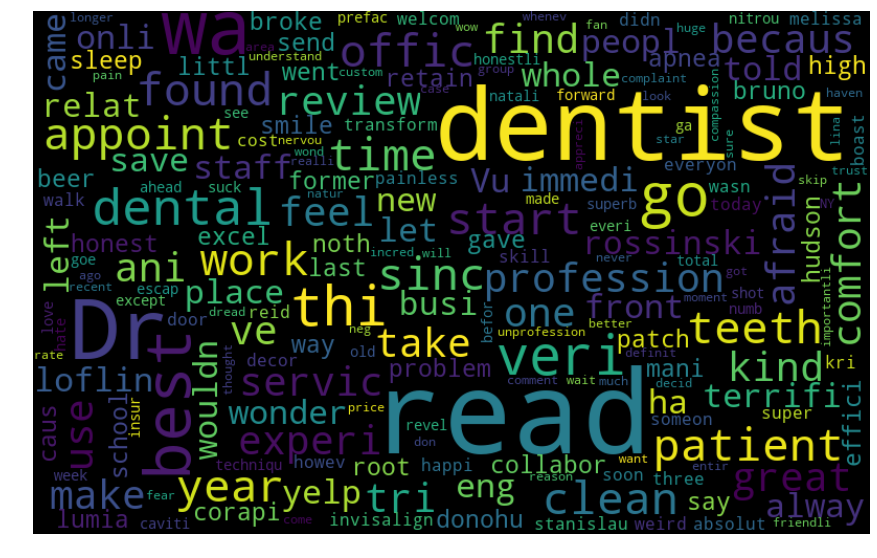

In [53]:
all_words = ' '.join([text for text in Dentist['Review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**It can be seen that most of the reviews are a perfect description, with dentist, dr,dental being the most frequent words.**